In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('temperature.csv')
df.head()

,record_id,month,day,year,AverageTemperatureFahr,AverageTemperatureUncertaintyFahr,City,country_id,Country,Latitude,Longitude
0,474376,1,1,1853,NaN,NaN,Auckland,NEW,New Zealand,36.17S,175.03E
1,474377,2,1,1853,NaN,NaN,Auckland,NEW,New Zealand,36.17S,175.03E
2,474378,3,1,1853,NaN,NaN,Auckland,NEW,New Zealand,36.17S,175.03E
3,474379,4,1,1853,NaN,NaN,Auckland,NEW,New Zealand,36.17S,175.03E
4,474380,5,1,1853,NaN,NaN,Auckland,NEW,New Zealand,36.17S,175.03E


In [3]:
df.drop(columns = ['record_id', 'day', 'month'], inplace = True)

In [4]:
df.fillna(df.mean())

,year,AverageTemperatureFahr,AverageTemperatureUncertaintyFahr,City,country_id,Country,Latitude,Longitude
0,1853,51.755134,34.334373,Auckland,NEW,New Zealand,36.17S,175.03E
1,1853,51.755134,34.334373,Auckland,NEW,New Zealand,36.17S,175.03E
2,1853,51.755134,34.334373,Auckland,NEW,New Zealand,36.17S,175.03E
3,1853,51.755134,34.334373,Auckland,NEW,New Zealand,36.17S,175.03E
4,1853,51.755134,34.334373,Auckland,NEW,New Zealand,36.17S,175.03E
...,...,...,...,...,...,...,...,...
48465,2013,55.054400,32.489600,Wroclaw,POL,Poland,50.63N,16.48E
48466,2013,61.167200,32.333000,Wroclaw,POL,Poland,50.63N,16.48E
48467,2013,66.770600,32.570600,Wroclaw,POL,Poland,50.63N,16.48E
48468,2013,64.565600,32.484200,Wroclaw,POL,Poland,50.63N,16.48E


**Data cleaning:** Record_id was not really necessary to what we need so we decided to drop that column entirely. There were also missing values, so we decided to fill them with the average (mean) values since most of the values were around each other.

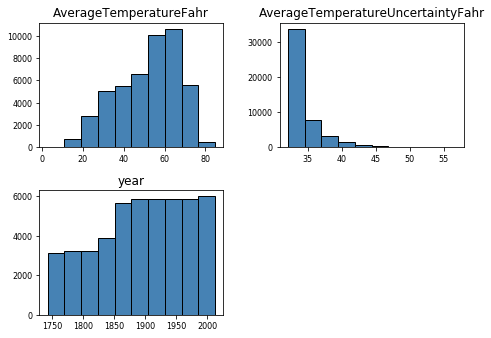

In [5]:
#Histogram
df.hist(color='steelblue', edgecolor='black', linewidth=1.0,
           xlabelsize=8, ylabelsize=8, grid=False)
plt.tight_layout(rect=(0, 0, 1.2, 1.2))  

As can be seen from the above **histogram**, the average temperature in fahrenheit seems to increases with the year. 

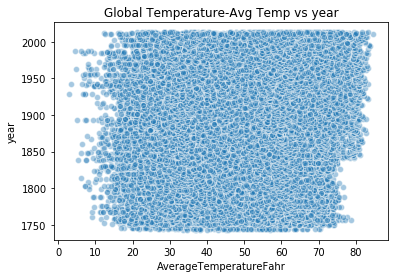

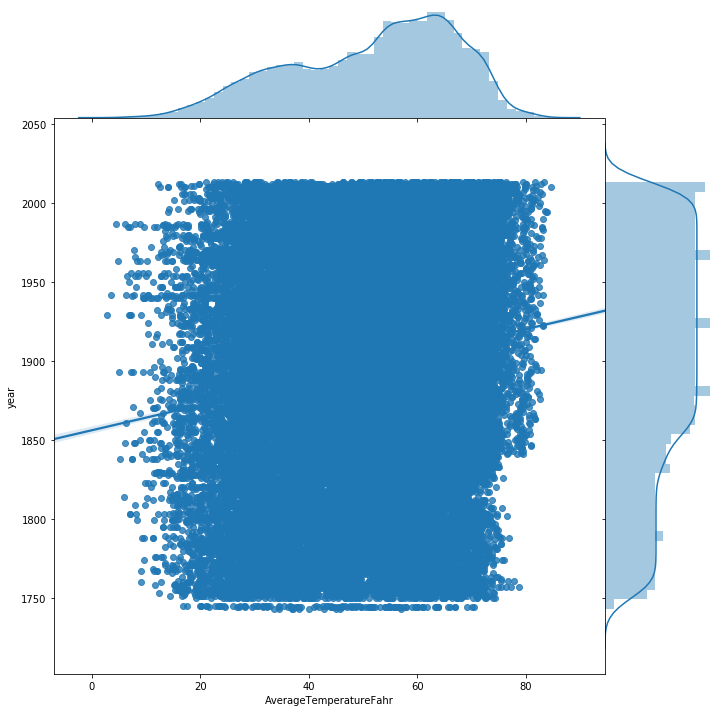

In [6]:
#scatter plots

plt.scatter(df['AverageTemperatureFahr'], df['year'],
            alpha=0.4, edgecolors='w')

plt.xlabel('AverageTemperatureFahr')
plt.ylabel('year')
plt.title('Global Temperature-Avg Temp vs year')


# Joint Plot
jp = sns.jointplot(x='AverageTemperatureFahr', y='year', data=df,
                   kind='reg', space=0, height=10)


From the above scatter plot and joint plot, one can see that the teperature has been more consistently higher when the years increased. The graph seems to be a bit skewed to the left. In the joint plot, you can see a steady increase in temperature as the years increase as well.

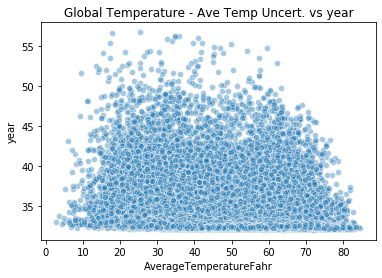

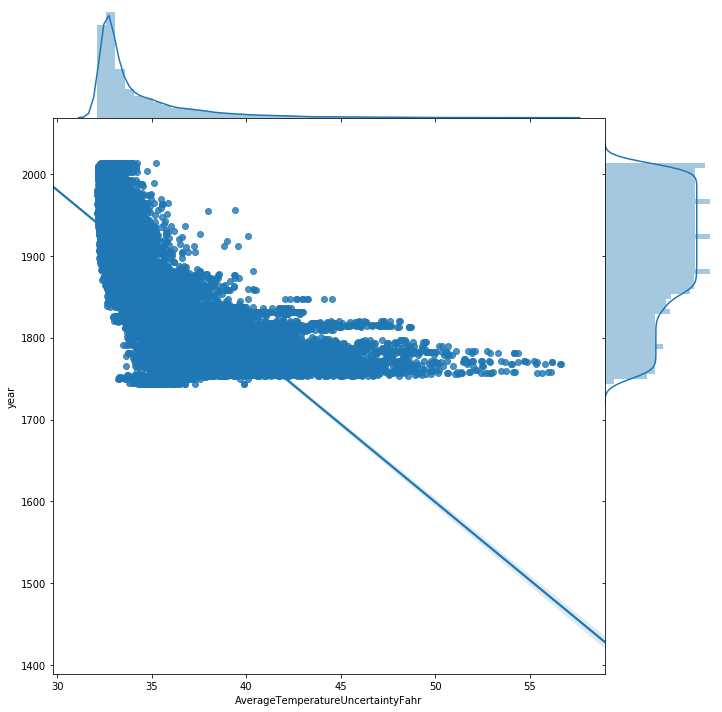

In [7]:
plt.scatter(df['AverageTemperatureFahr'], df['AverageTemperatureUncertaintyFahr'],
            alpha=0.4, edgecolors='w')

plt.xlabel('AverageTemperatureFahr')
plt.ylabel('year')
plt.title('Global Temperature - Ave Temp Uncert. vs year')

# Joint Plot
jp = sns.jointplot(x='AverageTemperatureUncertaintyFahr', y='year', data=df,
                   kind='reg', space=0, height=10)

Obviously the uncertainty of temperature is greater as the years decrease since proper temperature is harder to record from around the 1800s compared to the technology we have now to get proper readings of temperature. The graph is also skewed right in this instance. 

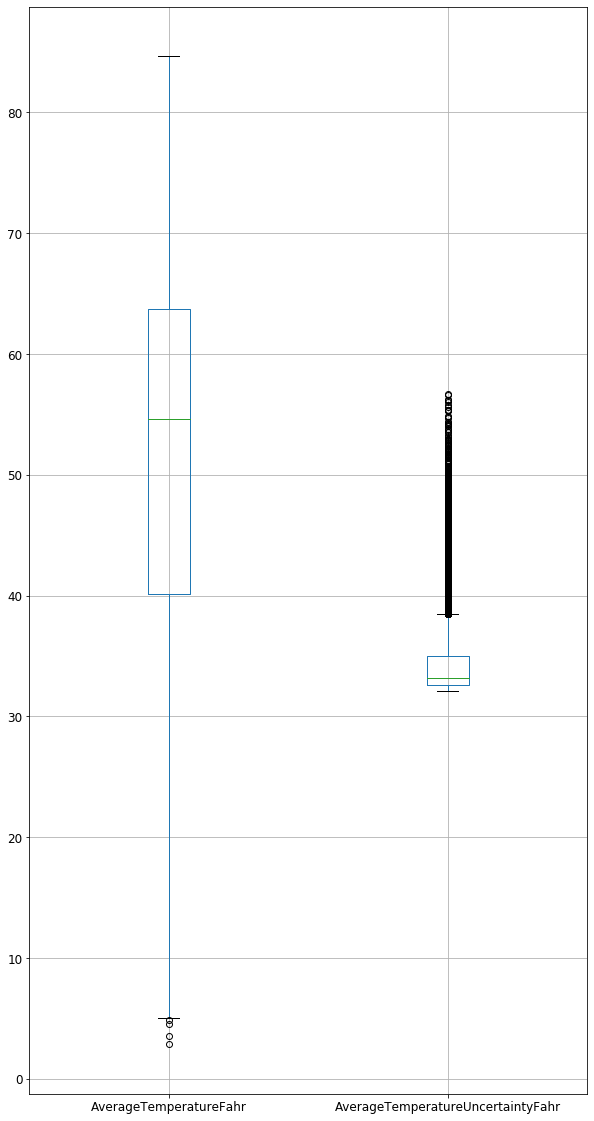

In [8]:
#Box plot
#f, (ax) = plt.subplots(1, 1, figsize=(12, 4))
#f.suptitle('Global Temperature', fontsize=14)

#sns.boxplot(x="AverageTemperatureFahr", y="year", data=df,  ax=ax)
#ax.set_xlabel("AverageTemperatureFahr",size = 12,alpha=0.8)
#ax.set_ylabel("year",size = 12,alpha=0.8)


#df = pd.DataFrame(columns = ['AverageTemperatureFahr', 'AverageTemperatureUncertaintyFahr, year'])
boxplot = df.boxplot(column = ['AverageTemperatureFahr', 'AverageTemperatureUncertaintyFahr'], fontsize = 12, figsize = (10,20))


From the boxplot, the mean is around 55 for the average temperature fahrenheit, while the uncertainty mean is about 35. Focusing primarily on the left boxplot, the lowest temperature average has been below 10 degrees fahrenheit while the highest has been 85+.

___________
Now we will explore our hypotheses.
### Hypothesis 1: Global warming temperatures increase as the years also increase, and thus have a correlation.
We can explore the relationship between global average temperature and years by using linear regression. The model will be trained to show us the static values we obtain from the temperature data set, as well as display the predicted x and y values according to the information given by the data. 

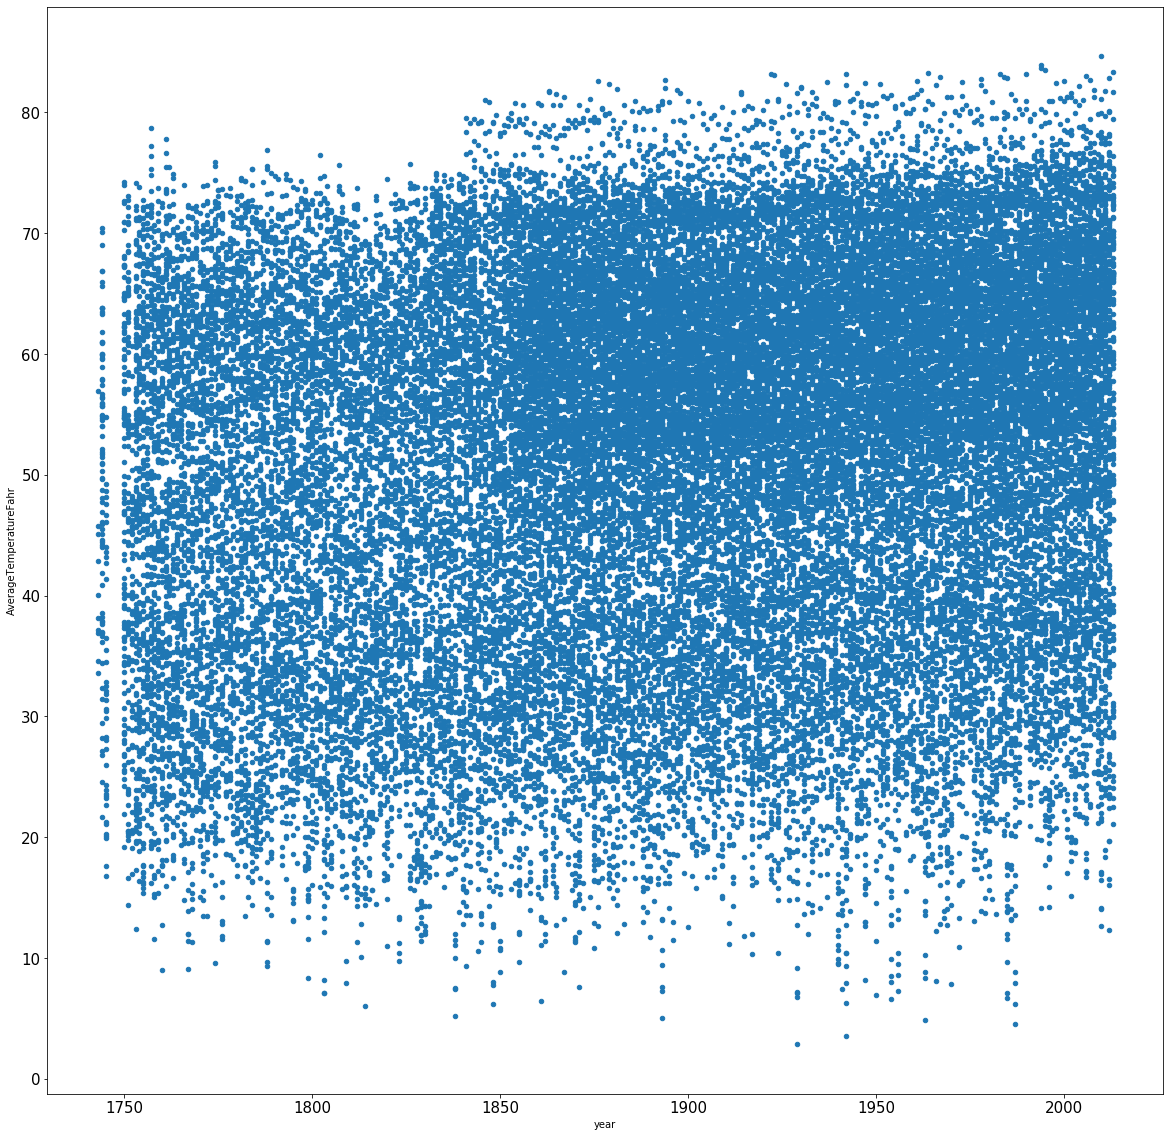

In [9]:
t_train = df
t_test = df
t_train.plot.scatter(x="year", y="AverageTemperatureFahr",fontsize = 15,figsize = (20,20))

Here we can see that there is a slightly more concentrated area, starting at around 50degrees on the y axis and the year 1850 and going to the top right corner of the graph. There is a slight upwards angle on the entire graph, probably due to the fact that this data set covers a information from the entire world. However, regardless of the massive amount of data we are working with, there are still trends to be discovered and analyzed. Notice the upwards skew of the entire plot, with this we can solidify the claim that average temperatures have indeed risen over the period of time shown. With this we can predict that this trend will continue. The upward skew is small, probably due to the fact that temperature change only needs to be minute in order to create massive environmental repercussions. 

In [10]:
import numpy as np
from sklearn.preprocessing import OneHotEncoder
from sklearn.linear_model import LinearRegression

t_train = t_train[t_train['AverageTemperatureFahr'].notna()]
t_test = t_train[t_train['AverageTemperatureFahr'].notna()]

X_train = t_train[["year"]]
X_test = t_test[["year"]]
y_train = t_train["AverageTemperatureFahr"]

model = LinearRegression()
model.fit(X=X_train, y=y_train)
model.predict(X=X_test)

array([50.19116503, 50.19116503, 50.19116503, ..., 55.80662817,
       55.80662817, 55.80662817])

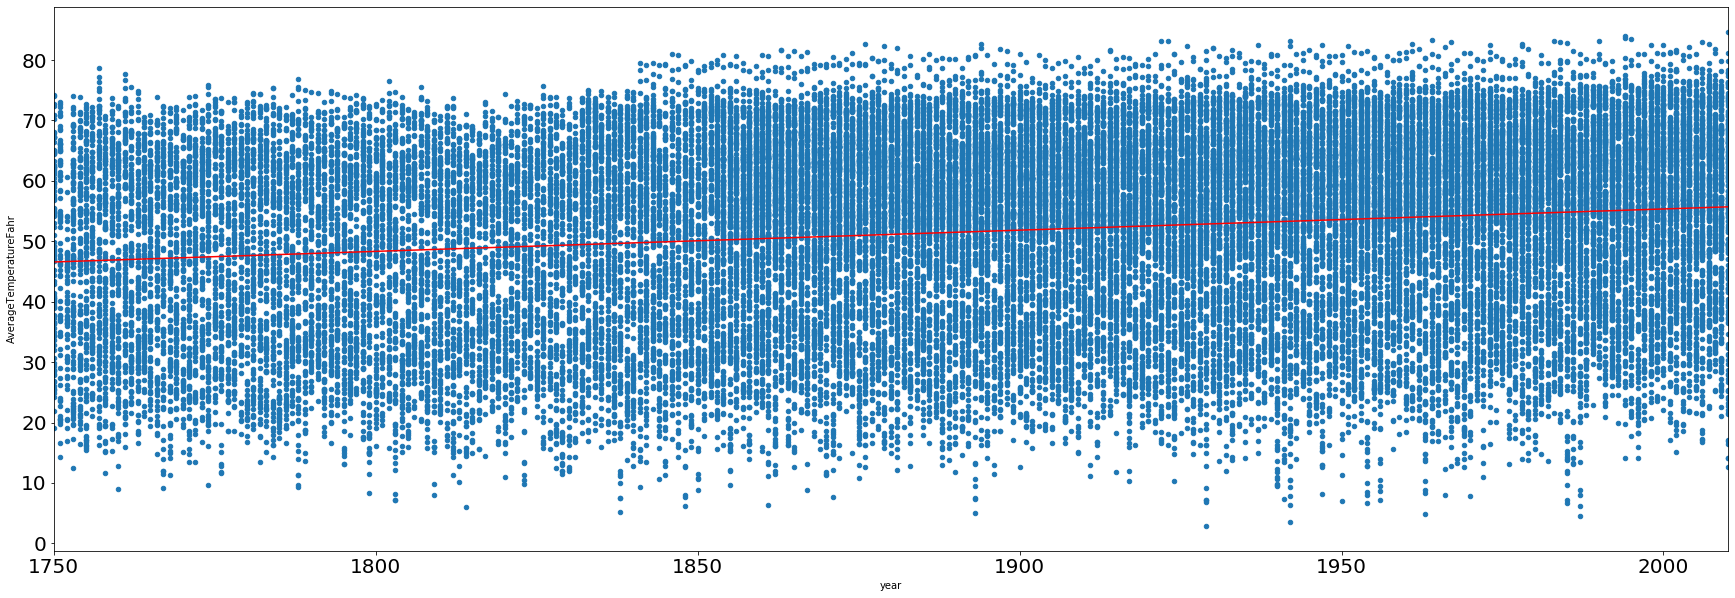

In [14]:

X_new = pd.DataFrame()
# create a sequence of 200 evenly spaced numbers from 10 to 41
X_new["year"] = np.linspace(1750, 2010, num=200)

# create a Series out of the predicted values
# (trailing underscore indicates fitted values)
y_new_ = pd.Series(
    model.predict(X_new), # y values in Series.plot.line()
    index=X_new["year"]    # x values in Series.plot.line()
)

# plot the data, then the model
t_train.plot.scatter(x="year", y="AverageTemperatureFahr", figsize = (30,10),fontsize = 20)
y_new_.plot.line(figsize = (30,10),fontsize = 20, color="red")

We further solidify our claim that average temperature has gradually risen from the collected data in 1750 up to present day. We have risen approximately 10-15 degrees as shown by the red line in our linear regression graph. (This graph reflects the same data as the previous one, but with altered dimensions to better showcase the datapoints and the linear regression line).
